# Unet model for Carvana Image Masking Challenge



In [ ]:
import numpy as np
import torch
import torch.nn.functional as F
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt

In [ ]:
from numpy import zeros
from numpy import ones
from numpy import expand_dims
from numpy.random import randn
from numpy.random import randint
from keras.datasets.cifar10 import load_data
from keras.optimizers import Adam
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.layers import Embedding
from keras.layers import Activation
from keras.layers import Concatenate
from keras.initializers import RandomNormal
from keras.utils import np_utils, to_categorical
import numpy as np
import matplotlib.pyplot as plt

## load model


In [ ]:
net = torch.hub.load('milesial/Pytorch-UNet', 'unet_carvana', pretrained=True)

Downloading: "https://github.com/milesial/Pytorch-UNet/archive/master.zip" to /root/.cache/torch/hub/master.zip
Downloading: "https://github.com/milesial/Pytorch-UNet/releases/download/v2.0/unet_carvana_scale0.5_epoch1.pth" to /root/.cache/torch/hub/checkpoints/unet_carvana_scale0.5_epoch1.pth


  0%|          | 0.00/65.9M [00:00<?, ?B/s]

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
net.to(device=device)
print(device)

cuda


## load image

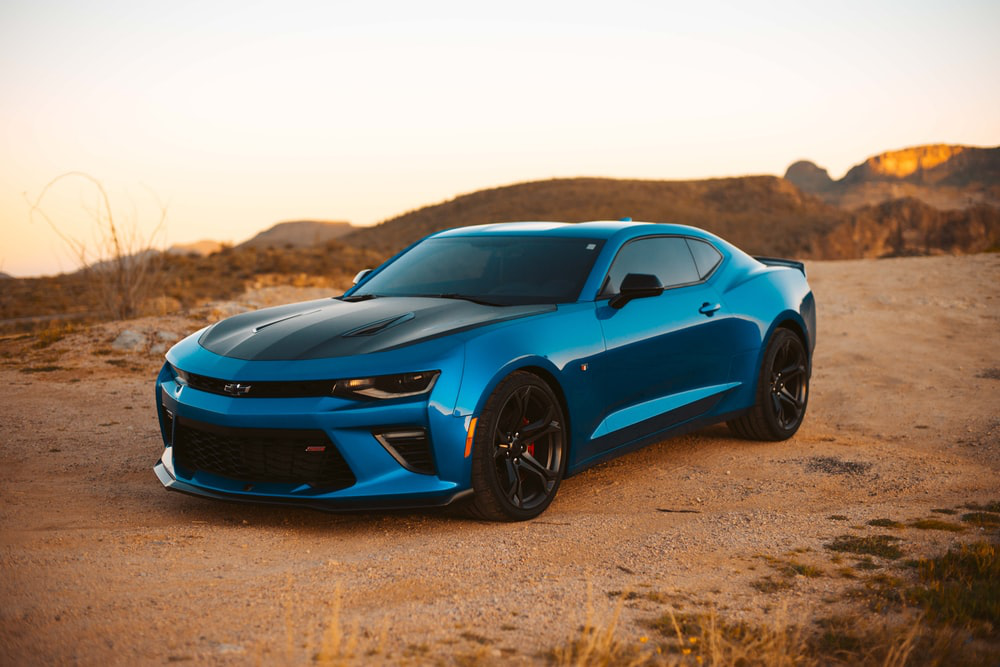

In [ ]:
main_image = Image.open('1.jpeg')
main_image

## preprocess image

In [ ]:
w, h = main_image.size
newW, newH = int(w), int(h)
img = main_image.resize((newW, newH), resample=Image.NEAREST)
img_ndarray = np.asarray(img)

In [ ]:
img_ndarray = img_ndarray.transpose((2, 0, 1))
img_ndarray.shape
img_ndarray = img_ndarray / 255

In [ ]:
img = torch.from_numpy(img_ndarray)
img = img.unsqueeze(0)
img = img.to(device=device, dtype=torch.float32)

## semantic segmentation

In [ ]:
out_threshold=0.5

net.eval()
with torch.no_grad():
  output = net(img)

  probs = torch.sigmoid(output)[0]

  tf = transforms.Compose([
      transforms.ToPILImage(),
      transforms.Resize((main_image.size[1], main_image.size[0])),
      transforms.ToTensor()
  ])

  full_mask = tf(probs.cpu()).squeeze()
  mask = (full_mask > out_threshold).numpy()

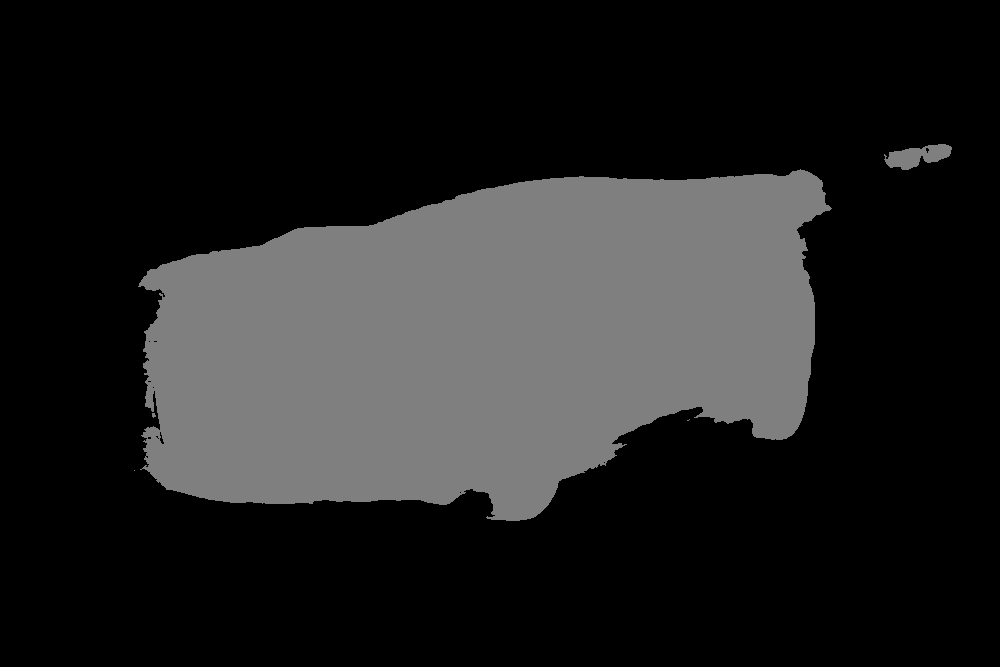

In [ ]:
result = Image.fromarray((np.argmax(mask, axis=0) * 255 / mask.shape[0]).astype(np.uint8))
result